In [1]:
import warnings
import numpy as np 
import pandas as pd
import plotly as py
import seaborn as sns
import statistics as stat
from datetime import date
import plotly.express as px
import plotly.graph_objs as go
warnings.filterwarnings("ignore")
pd.set_option('display.max_columns', None)
from plotly.offline import init_notebook_mode
init_notebook_mode(connected = True)
import matplotlib.lines as lines
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture
from sklearn.cluster import SpectralClustering
from sklearn.preprocessing import StandardScaler


In [32]:
df = pd.read_csv('C:\\Users\\PRATIK.DESKTOP-L8EI9JM\\Desktop\\marketing_campaign.csv', sep = '\t')

In [33]:
df

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,4,20,10,3,5,2,2,0,4,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,43,118,46,27,15,5,5,3,6,5,0,0,0,0,0,0,3,11,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10870,1967,Graduation,Married,61223.0,0,1,13-06-2013,46,709,43,182,42,118,247,2,9,3,4,5,0,0,0,0,0,0,3,11,0
2236,4001,1946,PhD,Together,64014.0,2,1,10-06-2014,56,406,0,30,0,0,8,7,8,2,5,7,0,0,0,1,0,0,3,11,0
2237,7270,1981,Graduation,Divorced,56981.0,0,0,25-01-2014,91,908,48,217,32,12,24,1,2,3,13,6,0,1,0,0,0,0,3,11,0
2238,8235,1956,Master,Together,69245.0,0,1,24-01-2014,8,428,30,214,80,30,61,2,6,5,10,3,0,0,0,0,0,0,3,11,0


In [34]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

In [35]:
df.describe()

,ID,Year_Birth,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
count,2240.000000,2240.000000,2216.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.0,2240.0,2240.000000
mean,5592.159821,1968.805804,52247.251354,0.444196,0.506250,49.109375,303.935714,26.302232,166.950000,37.525446,27.062946,44.021875,2.325000,4.084821,2.662054,5.790179,5.316518,0.072768,0.074554,0.072768,0.064286,0.013393,0.009375,3.0,11.0,0.149107
std,3246.662198,11.984069,25173.076661,0.538398,0.544538,28.962453,336.597393,39.773434,225.715373,54.628979,41.280498,52.167439,1.932238,2.778714,2.923101,3.250958,2.426645,0.259813,0.262728,0.259813,0.245316,0.114976,0.096391,0.0,0.0,0.356274
min,0.000000,1893.000000,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
25%,2828.250000,1959.000000,35303.000000,0.000000,0.000000,24.000000,23.750000,1.000000,16.000000,3.000000,1.000000,9.000000,1.000000,2.000000,0.000000,3.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
50%,5458.500000,1970.000000,51381.500000,0.000000,0.000000,49.000000,173.500000,8.000000,67.000000,12.000000,8.000000,24.000000,2.000000,4.000000,2.000000,5.000000,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
75%,8427.750000,1977.000000,68522.000000,1.000000,1.000000,74.000000,504.250000,33.000000,232.000000,50.000000,33.000000,56.000000,3.000000,6.000000,4.000000,8.000000,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
max,11191.000000,1996.000000,666666.000000,2.000000,2.000000,99.000000,1493.000000,199.000000,1725.000000,259.000000,263.000000,362.000000,15.000000,27.000000,28.000000,13.000000,20.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.0,11.0,1.000000


In [36]:
df['Kids'] = df['Kidhome'] + df['Teenhome']

re_marital = {
    'Single': 'Not in relationship',
    'Together': 'In relationship',
    'Married': 'In relationship',
    'Divorced': 'Not in relationship',
    'Widow': 'Not in relationship',
    'Alone': 'Not in relationship',
    'Absurd': 'Not in relationship',
    'YOLO': 'Not in relationship'
}

df['Marital_Status'] = df['Marital_Status'].map(re_marital)

df['Family_size'] = 0
for i in range(len(df)):
    if df['Marital_Status'][i] == 'In relationship':
        df['Family_size'][i] = 2 + df['Kids'][i]
    else:
        df['Family_size'][i] = 1 + df['Kids'][i]

In [37]:
df.head(3)

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,Kids,Family_size
0,5524,1957,Graduation,Not in relationship,58138.0,0,0,04-09-2012,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,3,11,1,0,1
1,2174,1954,Graduation,Not in relationship,46344.0,1,1,08-03-2014,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,3,11,0,2,3
2,4141,1965,Graduation,In relationship,71613.0,0,0,21-08-2013,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,3,11,0,0,2


In [38]:
df['Dt_Customer'] = pd.to_datetime(df['Dt_Customer'])
df['Dt_Customer'].max()

Timestamp('2014-12-06 00:00:00')

In [39]:
df['Age'] = 2014 - df['Year_Birth']

df['Collected'] = '2014-12-07'

df['Collected'] = pd.to_datetime(df['Collected'])

df['Days_is_client'] = (df['Collected'] - df['Dt_Customer']).dt.days

In [40]:
df['MntTotal'] = df['MntWines'] + df['MntFruits'] + df['MntMeatProducts'] + df['MntFishProducts'] + df['MntSweetProducts'] + df['MntGoldProds']

df['NumAllPurchases'] = df['NumWebPurchases'] + df['NumCatalogPurchases'] + df['NumStorePurchases']

df['AverageCheck'] = round((df['MntTotal'] / df['NumAllPurchases']), 1)

df['ShareDealsPurchases'] = round((df['NumDealsPurchases'] / df['NumAllPurchases']) * 100, 1)

df['TotalAcceptedCmp'] = df['AcceptedCmp1'] + df['AcceptedCmp2'] + df['AcceptedCmp3'] + df['AcceptedCmp4'] + df['AcceptedCmp5'] + df['Response']

In [41]:
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,Kids,Family_size,Age,Collected,Days_is_client,MntTotal,NumAllPurchases,AverageCheck,ShareDealsPurchases,TotalAcceptedCmp
0,5524,1957,Graduation,Not in relationship,58138.0,0,0,2012-04-09,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,3,11,1,0,1,57,2014-12-07,972,1617,22,73.5,13.6,1
1,2174,1954,Graduation,Not in relationship,46344.0,1,1,2014-08-03,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,3,11,0,2,3,60,2014-12-07,126,27,4,6.8,50.0,0
2,4141,1965,Graduation,In relationship,71613.0,0,0,2013-08-21,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,3,11,0,0,2,49,2014-12-07,473,776,20,38.8,5.0,0
3,6182,1984,Graduation,In relationship,26646.0,1,0,2014-10-02,26,11,4,20,10,3,5,2,2,0,4,6,0,0,0,0,0,0,3,11,0,1,3,30,2014-12-07,66,53,6,8.8,33.3,0
4,5324,1981,PhD,In relationship,58293.0,1,0,2014-01-19,94,173,43,118,46,27,15,5,5,3,6,5,0,0,0,0,0,0,3,11,0,1,3,33,2014-12-07,322,422,14,30.1,35.7,0


In [48]:
df.NumAllPurchases.unique()

array([22,  4, 20,  6, 14, 17,  8,  5,  1,  3, 15, 12, 25, 11, 24, 28, 13,
       10, 27,  7, 23, 19, 16, 26, 18, 31,  9, 21, 32, 29, 30,  0,  2],
      dtype=int64)

In [51]:
df0 = df[df['NumAllPurchases']==0]   # these are the rows where the num of all purchase is zero but some payment is made so we remove these

df0

df0.shape

(6, 39)

In [52]:
df = df.query("NumAllPurchases != 0")

In [53]:
df['Income'].fillna(df['Income'].mean(), inplace = True)

In [54]:
# Remove all unnecessary columns.

df.drop(['ID', 'Year_Birth', 'Kidhome', 'Teenhome', 'Dt_Customer', 'Z_CostContact', 'Z_Revenue', 'Collected'], axis = 1, inplace = True)

In [55]:
df

,Education,Marital_Status,Income,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response,Kids,Family_size,Age,Days_is_client,MntTotal,NumAllPurchases,AverageCheck,ShareDealsPurchases,TotalAcceptedCmp
0,Graduation,Not in relationship,58138.0,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,1,0,1,57,972,1617,22,73.5,13.6,1
1,Graduation,Not in relationship,46344.0,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,0,2,3,60,126,27,4,6.8,50.0,0
2,Graduation,In relationship,71613.0,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,0,0,2,49,473,776,20,38.8,5.0,0
3,Graduation,In relationship,26646.0,26,11,4,20,10,3,5,2,2,0,4,6,0,0,0,0,0,0,0,1,3,30,66,53,6,8.8,33.3,0
4,PhD,In relationship,58293.0,94,173,43,118,46,27,15,5,5,3,6,5,0,0,0,0,0,0,0,1,3,33,322,422,14,30.1,35.7,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,Graduation,In relationship,61223.0,46,709,43,182,42,118,247,2,9,3,4,5,0,0,0,0,0,0,0,1,3,47,542,1341,16,83.8,12.5,0
2236,PhD,In relationship,64014.0,56,406,0,30,0,0,8,7,8,2,5,7,0,0,0,1,0,0,0,3,5,68,62,444,15,29.6,46.7,1
2237,Graduation,Not in relationship,56981.0,91,908,48,217,32,12,24,1,2,3,13,6,0,1,0,0,0,0,0,0,1,33,316,1241,18,68.9,5.6,1
2238,Master,In relationship,69245.0,8,428,30,214,80,30,61,2,6,5,10,3,0,0,0,0,0,0,0,1,3,58,317,843,21,40.1,9.5,0


In [56]:
df['Income'] = np.where(df['Income'] > 120000, 120000, df['Income'])

df['AverageCheck'] = np.where(df['AverageCheck'] > 200, 200, df['AverageCheck'])

In [57]:
df['ActiveDays'] = df['Days_is_client'] - df['Recency']

In [58]:
df.head(3)

,Education,Marital_Status,Income,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response,Kids,Family_size,Age,Days_is_client,MntTotal,NumAllPurchases,AverageCheck,ShareDealsPurchases,TotalAcceptedCmp,ActiveDays
0,Graduation,Not in relationship,58138.0,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,1,0,1,57,972,1617,22,73.5,13.6,1,914
1,Graduation,Not in relationship,46344.0,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,0,2,3,60,126,27,4,6.8,50.0,0,88
2,Graduation,In relationship,71613.0,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,0,0,2,49,473,776,20,38.8,5.0,0,447


In [59]:
# clustering and EDA
# Clustering will be done based on average check, count of all purchases and the time that person is a client.

In [60]:
df_clust = df[['AverageCheck', 'Days_is_client', 'NumAllPurchases']].copy()

for i in df_clust.columns:
    df_clust[i] = StandardScaler().fit_transform(np.array(df_clust[[i]]))

In [67]:
df_clust

,AverageCheck,Days_is_client,NumAllPurchases
0,1.188823,1.975431,1.312465
1,-1.016467,-1.670576,-1.192963
2,0.041543,-0.175110,1.034084
3,-0.950342,-1.929158,-0.914582
4,-0.246103,-0.825875,0.198941
...,...,...,...
2235,1.529370,0.122259,0.477322
2236,-0.262635,-1.946397,0.338132
2237,1.036734,-0.851733,0.755703
2238,0.084525,-0.847423,1.173274


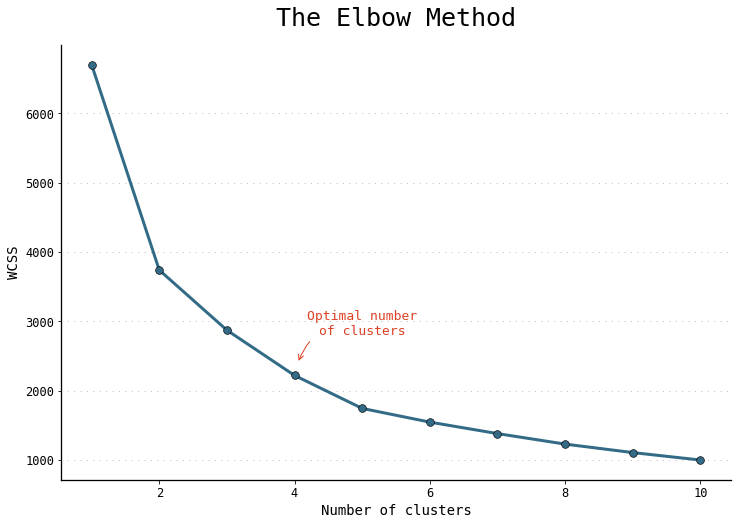

In [65]:
wcss = []
for i in range(1, 11):
    km = KMeans(n_clusters = i, random_state = 228)
    km.fit(df_clust)                                  # fitting the KMeans engine on the intended columns
    wcss.append(km.inertia_)
    
plt.figure(figsize = (12, 8))

plt.title('The Elbow Method', size = 25, y = 1.03, fontname = 'monospace')

plt.grid(color = 'gray', linestyle = ':', axis = 'y', alpha = 0.8, zorder = 0,  dashes = (1,7))

a = sns.lineplot(x = range(1, 11), y = wcss, color = '#336b87', linewidth = 3)

sns.scatterplot(x = range(1, 11), y = wcss, color = '#336b87', s = 60, edgecolor = 'black', zorder = 5)

plt.ylabel('WCSS', size = 14, fontname = 'monospace')

plt.xlabel('Number of clusters', size = 14, fontname = 'monospace')

plt.xticks(size = 12, fontname = 'monospace')

plt.yticks(size = 12, fontname = 'monospace')

for j in ['right', 'top']:
    a.spines[j].set_visible(False)

a.spines['bottom'].set_linewidth(1.3)

a.spines['left'].set_linewidth(1.3)

plt.annotate('''Optimal number
of clusters''', xy = (4.05, 2400), xytext = (5, 2800),
             arrowprops = dict(facecolor = 'steelblue', arrowstyle = "->", connectionstyle = "arc3,rad = 0.4",color = '#dd4124'), 
             fontsize = 13, fontfamily = 'monospace', ha = 'center', color = '#dd4124')

plt.show()

In [66]:
df

,Education,Marital_Status,Income,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response,Kids,Family_size,Age,Days_is_client,MntTotal,NumAllPurchases,AverageCheck,ShareDealsPurchases,TotalAcceptedCmp,ActiveDays
0,Graduation,Not in relationship,58138.0,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,1,0,1,57,972,1617,22,73.5,13.6,1,914
1,Graduation,Not in relationship,46344.0,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,0,2,3,60,126,27,4,6.8,50.0,0,88
2,Graduation,In relationship,71613.0,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,0,0,2,49,473,776,20,38.8,5.0,0,447
3,Graduation,In relationship,26646.0,26,11,4,20,10,3,5,2,2,0,4,6,0,0,0,0,0,0,0,1,3,30,66,53,6,8.8,33.3,0,40
4,PhD,In relationship,58293.0,94,173,43,118,46,27,15,5,5,3,6,5,0,0,0,0,0,0,0,1,3,33,322,422,14,30.1,35.7,0,228
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,Graduation,In relationship,61223.0,46,709,43,182,42,118,247,2,9,3,4,5,0,0,0,0,0,0,0,1,3,47,542,1341,16,83.8,12.5,0,496
2236,PhD,In relationship,64014.0,56,406,0,30,0,0,8,7,8,2,5,7,0,0,0,1,0,0,0,3,5,68,62,444,15,29.6,46.7,1,6
2237,Graduation,Not in relationship,56981.0,91,908,48,217,32,12,24,1,2,3,13,6,0,1,0,0,0,0,0,0,1,33,316,1241,18,68.9,5.6,1,225
2238,Master,In relationship,69245.0,8,428,30,214,80,30,61,2,6,5,10,3,0,0,0,0,0,0,0,1,3,58,317,843,21,40.1,9.5,0,309


In [71]:
gmm = GaussianMixture(n_components = 4, covariance_type = 'spherical', max_iter = 3000, random_state = 228).fit(df_clust)   #  fitting the gausian mixture on the df_clust
labels = gmm.predict(df_clust)

df['Cluster'] = labels     # labels are generated by gaussian mixtue algo while creating the new column
re_clust = {
    0: 'Ordinary client',
    1: 'Elite client',
    2: 'Good client',
    3: 'Potential good client'
}
df['Cluster'] = df['Cluster'].map(re_clust)   # mapping the keys to the respective labels

In [74]:
df

,Education,Marital_Status,Income,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response,Kids,Family_size,Age,Days_is_client,MntTotal,NumAllPurchases,AverageCheck,ShareDealsPurchases,TotalAcceptedCmp,ActiveDays,Cluster
0,Graduation,Not in relationship,58138.0,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,1,0,1,57,972,1617,22,73.5,13.6,1,914,Ordinary client
1,Graduation,Not in relationship,46344.0,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,0,2,3,60,126,27,4,6.8,50.0,0,88,Elite client
2,Graduation,In relationship,71613.0,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,0,0,2,49,473,776,20,38.8,5.0,0,447,Good client
3,Graduation,In relationship,26646.0,26,11,4,20,10,3,5,2,2,0,4,6,0,0,0,0,0,0,0,1,3,30,66,53,6,8.8,33.3,0,40,Elite client
4,PhD,In relationship,58293.0,94,173,43,118,46,27,15,5,5,3,6,5,0,0,0,0,0,0,0,1,3,33,322,422,14,30.1,35.7,0,228,Good client
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,Graduation,In relationship,61223.0,46,709,43,182,42,118,247,2,9,3,4,5,0,0,0,0,0,0,0,1,3,47,542,1341,16,83.8,12.5,0,496,Ordinary client
2236,PhD,In relationship,64014.0,56,406,0,30,0,0,8,7,8,2,5,7,0,0,0,1,0,0,0,3,5,68,62,444,15,29.6,46.7,1,6,Good client
2237,Graduation,Not in relationship,56981.0,91,908,48,217,32,12,24,1,2,3,13,6,0,1,0,0,0,0,0,0,1,33,316,1241,18,68.9,5.6,1,225,Good client
2238,Master,In relationship,69245.0,8,428,30,214,80,30,61,2,6,5,10,3,0,0,0,0,0,0,0,1,3,58,317,843,21,40.1,9.5,0,309,Good client


In [75]:
# plotting the pi diagram of the cluster generated

fig = px.pie(df['Cluster'].value_counts().reset_index(), values = 'Cluster', names = 'index', width = 700, height = 700)
fig.update_traces(textposition = 'inside', 
                  textinfo = 'percent + label', 
                  hole = 0.8, 
                  marker = dict(colors = ['#dd4124','#009473', '#336b87', '#b4b4b4'], line = dict(color = 'white', width = 2)),
                  hovertemplate = 'Clients: %{value}')

fig.update_layout(annotations = [dict(text = 'Number of clients <br>by cluster', 
                                      x = 0.5, y = 0.5, font_size = 28, showarrow = False, 
                                      font_family = 'monospace',
                                      font_color = 'black')],
                  showlegend = False)
                  
fig.show()


In [83]:
plot = go.Figure()

colors = ['#b4b4b4', '#dd4124', '#009473', '#336b87']
names = ['Ordinary client', 'Elite client', 'Good client', 'Potential good client']

for i in range(4):
    cl = names[i]
    plot.add_trace(go.Scatter3d(x = df.query("Cluster == @cl")['NumAllPurchases'],
                                y = df.query("Cluster == @cl")['AverageCheck'],
                                z = df.query("Cluster == @cl")['Days_is_client'],
                                mode = 'markers',
                                name = names[i],
                                marker = dict(
                                    size = 2,
                                    color = colors[i],  
                                    opacity = 0.6)))

plot.update_traces(hovertemplate = 'Purchases: %{x} <br>Average Check: %{y} <br>Days is client: %{z}')

plot.update_layout(width = 800, height = 800, autosize = True, showlegend = False,
                   scene = dict(xaxis = dict(title = 'Count of purchases', titlefont_color = 'black'),
                                yaxis = dict(title = 'Average check', titlefont_color = 'black'),
                                zaxis = dict(title = 'Days is client', titlefont_color = 'black')),
                   font = dict(family = "monospace", color  = 'black', size = 12),
                   title_text = 'Customers clusters', title_x = 0.5)

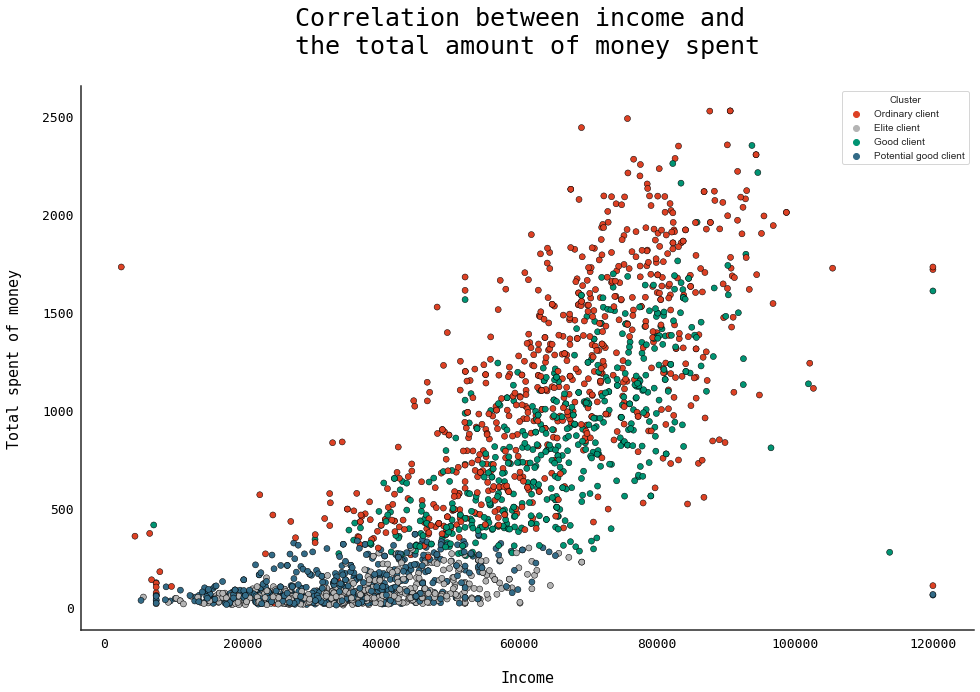

In [84]:
plt.figure(figsize = (16, 10))
sns.set_style("white")
plt.title('''Correlation between income and 
the total amount of money spent''', size = 25, y = 1.05, fontname = 'monospace', color = 'black', ha = 'center')
a = sns.scatterplot(data = df, x = "Income", y = "MntTotal", hue = "Cluster", palette = ['#dd4124', '#b4b4b4', '#009473', '#336b87'], sizes = (1, 8), linewidth = 0.5, edgecolor = "black")
plt.xticks(fontname = 'monospace', size = 13, color = 'black')
plt.yticks(fontname = 'monospace', size = 13, color = 'black')
plt.xlabel('Income', labelpad = 20, fontname = 'monospace', fontsize = 15, color = 'black')
plt.ylabel('Total spent of money', labelpad = 20, fontname = 'monospace', fontsize = 15, color = 'black')


for j in ['right', 'top']:
        a.spines[j].set_visible(False)
for j in ['bottom', 'left']:
    a.spines[j].set_linewidth(1.5)
    
plt.show()

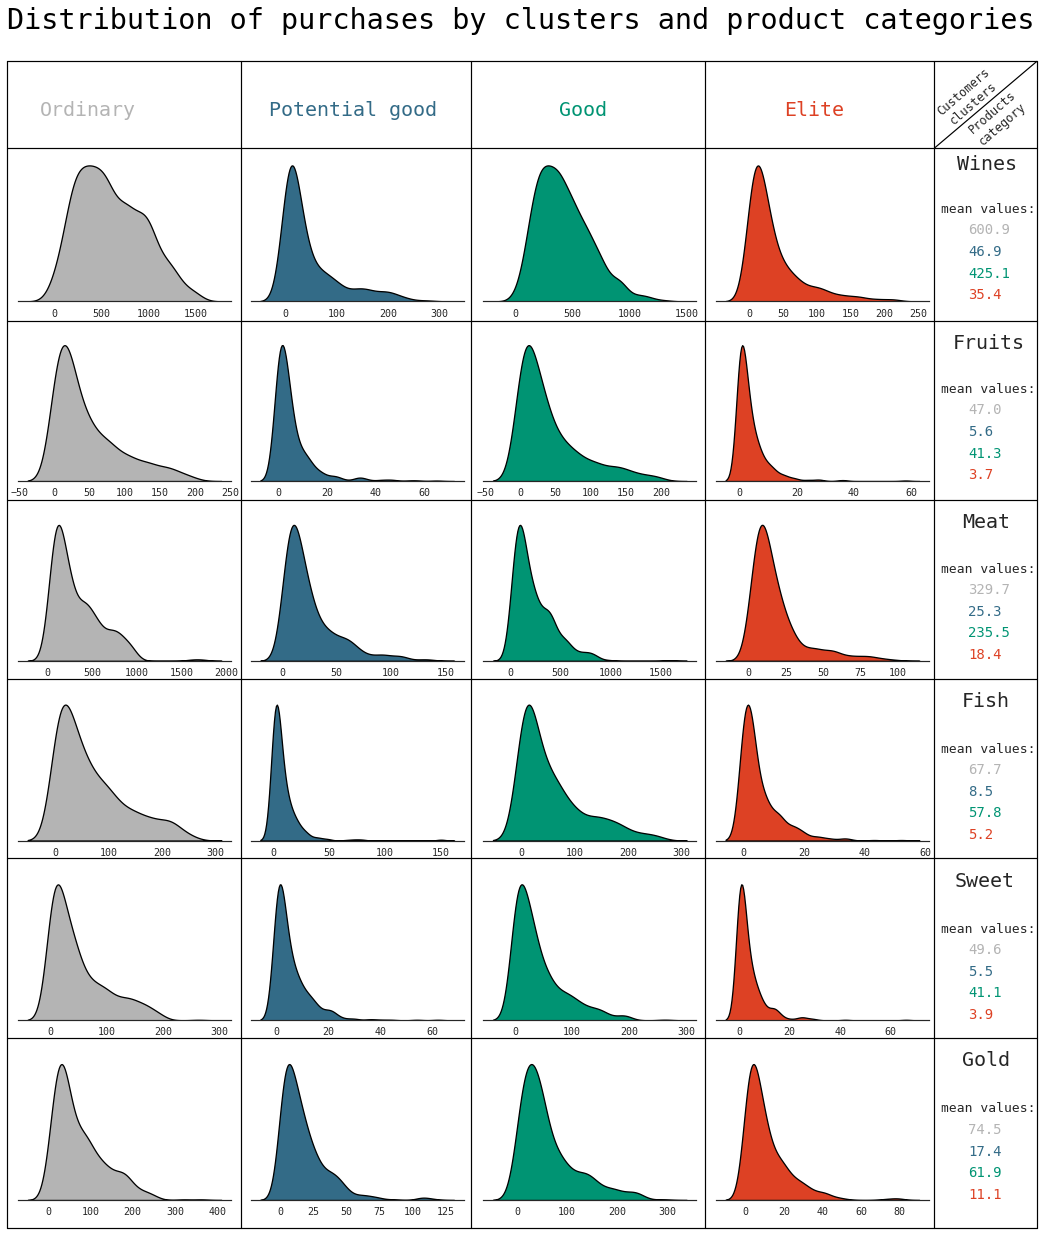

In [87]:
df = df.rename(columns = {'MntWines': 'Wines', 
                       'MntFruits': 'Fruits', 
                       'MntMeatProducts': 'Meat', 
                       'MntFishProducts': 'Fish', 
                       'MntSweetProducts': 'Sweet', 
                       'MntGoldProds': 'Gold'})

cl = ['Ordinary client', 'Potential good client', 'Good client', 'Elite client']
#cl = ['Ordinary client', 'Elite client', 'Good client', 'Potential good client']
colors = {
    'Ordinary client': '#b4b4b4',
    'Potential good client': '#336b87',
    'Good client': '#009473',
    'Elite client': '#dd4124'
}

fig = plt.figure(figsize = (13, 15))
p = 1
for i in range(len(df.columns.tolist()[4:10])):
    for k in cl:
        plt.subplot(6, 4, p)
        sns.set_style("white")
        a = sns.kdeplot(df.query("Cluster == @k")[df.columns.tolist()[4:10][i]], color = colors[k], alpha = 1, shade = True, linewidth = 1.3, edgecolor = 'black')
        plt.ylabel('')
        plt.xlabel('')
        plt.xticks(fontname = 'monospace')
        plt.yticks([])
        for j in ['right', 'left', 'top']:
            a.spines[j].set_visible(False)
            a.spines['bottom'].set_linewidth(1.2)
        p += 1  

plt.figtext(0., 1.11, 'Distribution of purchases by clusters and product categories', fontname = 'monospace', size = 28.5, color = 'black')        

plt.figtext(0.035, 1.03, 'Ordinary', fontname = 'monospace', size = 20, color = '#b4b4b4')      
plt.figtext(0.28, 1.03, 'Potential good', fontname = 'monospace', size = 20, color = '#336b87') 
plt.figtext(0.59, 1.03, 'Good', fontname = 'monospace', size = 20, color = '#009473') 
plt.figtext(0.83, 1.03, 'Elite', fontname = 'monospace', size = 20, color = '#dd4124') 

plt.figtext(1.015, 0.98, 'Wines', fontname = 'monospace', size = 20)   
plt.figtext(1.01, 0.814, 'Fruits', fontname = 'monospace', size = 20)
plt.figtext(1.02, 0.648, 'Meat', fontname = 'monospace', size = 20)
plt.figtext(1.02, 0.482, 'Fish', fontname = 'monospace', size = 20)
plt.figtext(1.012, 0.316, 'Sweet', fontname = 'monospace', size = 20)
plt.figtext(1.02, 0.15, 'Gold', fontname = 'monospace', size = 20)

l1 = lines.Line2D([0.99, 0.99], [1.08, 0], transform = fig.transFigure, figure = fig, color = 'black', linestyle = '-',linewidth = 1.2)
fig.lines.extend([l1])
l2 = lines.Line2D([0.0, 1.1], [1, 1], transform = fig.transFigure, figure = fig, color = 'black', linestyle = '-',linewidth = 1.2)
fig.lines.extend([l2])
l3 = lines.Line2D([0.991, 1.1], [1, 1.08], transform = fig.transFigure, figure = fig, color = 'black', linestyle = '-',linewidth = 1.2)
fig.lines.extend([l3])
l4 = lines.Line2D([0, 1.1], [1.08, 1.08], transform = fig.transFigure, figure = fig, color = 'black', linestyle = '-',linewidth = 1.2)
fig.lines.extend([l4])
l5 = lines.Line2D([1.1, 1.1], [0, 1.08], transform = fig.transFigure, figure = fig, color = 'black', linestyle = '-',linewidth = 1.2)
fig.lines.extend([l5])
l6 = lines.Line2D([0, 0], [0, 1.08], transform = fig.transFigure, figure = fig, color = 'black', linestyle = '-',linewidth = 1.2)
fig.lines.extend([l6])
l7 = lines.Line2D([0, 1.1], [0, 0], transform = fig.transFigure, figure = fig, color = 'black', linestyle = '-',linewidth = 1.2)
fig.lines.extend([l7])
l8 = lines.Line2D([0, 1.1], [0.84, 0.84], transform = fig.transFigure, figure = fig, color = 'black', linestyle = '-',linewidth = 1.2)
fig.lines.extend([l8])
l9 = lines.Line2D([0, 1.1], [0.674, 0.674], transform = fig.transFigure, figure = fig, color = 'black', linestyle = '-',linewidth = 1.2)
fig.lines.extend([l9])
l10 = lines.Line2D([0, 1.1], [0.508, 0.508], transform = fig.transFigure, figure = fig, color = 'black', linestyle = '-',linewidth = 1.2)
fig.lines.extend([l10])
l11 = lines.Line2D([0, 1.1], [0.342, 0.342], transform = fig.transFigure, figure = fig, color = 'black', linestyle = '-',linewidth = 1.2)
fig.lines.extend([l11])
l12 = lines.Line2D([0, 1.1], [0.176, 0.176], transform = fig.transFigure, figure = fig, color = 'black', linestyle = '-',linewidth = 1.2)
fig.lines.extend([l12])
l13 = lines.Line2D([0.25, 0.25], [0, 1.08], transform = fig.transFigure, figure = fig, color = 'black', linestyle = '-',linewidth = 1.2)
fig.lines.extend([l13])
l14 = lines.Line2D([0.495, 0.495], [0, 1.08], transform = fig.transFigure, figure = fig, color = 'black', linestyle = '-',linewidth = 1.2)
fig.lines.extend([l14])
l15 = lines.Line2D([0.745, 0.745], [0, 1.08], transform = fig.transFigure, figure = fig, color = 'black', linestyle = '-',linewidth = 1.2)
fig.lines.extend([l15])

plt.figtext(1.027, 1.02, '''Customers
clusters''', fontname = 'monospace', size = 12, rotation = 41, ha = 'center')   
plt.figtext(1.025, 1.003, '''Products
category''', fontname = 'monospace', size = 12, rotation = 41)

y = 0.94
for i in range(6):
    plt.figtext(0.998, y, 'mean values:', fontname = 'monospace', size = 13)
    y -= 0.1666
    
y = 0.92
for i in df.columns.tolist()[4:10]:
    plt.figtext(1.027, y, round(df.query("Cluster == 'Ordinary client'")[i].mean(), 1), fontname = 'monospace', size = 14, color = '#b4b4b4')
    y -= 0.1666
    
y = 0.9
for i in df.columns.tolist()[4:10]:
    plt.figtext(1.027, y, round(df.query("Cluster == 'Potential good client'")[i].mean(), 1), fontname = 'monospace', size = 14, color = '#336b87')
    y -= 0.1666
    
y = 0.88
for i in df.columns.tolist()[4:10]:
    plt.figtext(1.027, y, round(df.query("Cluster == 'Good client'")[i].mean(), 1), fontname = 'monospace', size = 14, color = '#009473')
    y -= 0.1666
    
y = 0.86
for i in df.columns.tolist()[4:10]:
    plt.figtext(1.027, y, round(df.query("Cluster == 'Elite client'")[i].mean(), 1), fontname = 'monospace', size = 14, color = '#dd4124')
    y -= 0.1666

fig.tight_layout(h_pad = 2)
plt.show()


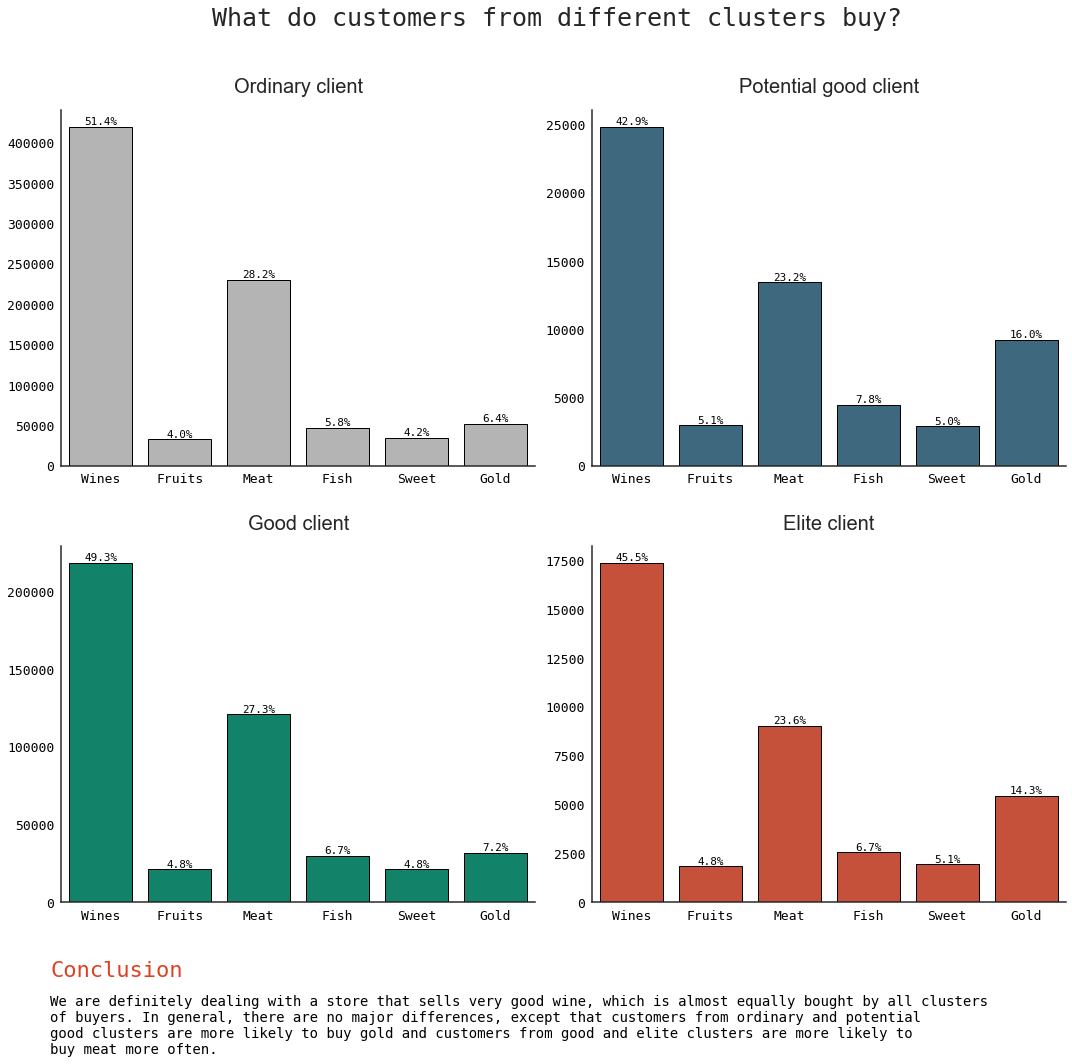

In [88]:
# what customers from different custers buy

fig = plt.figure(figsize = (15, 12))
k = 1

for i in cl:
    ass = df.groupby(['Cluster']).agg({'Wines': 'sum', 'Fruits': 'sum', 'Meat': 'sum', 'Fish': 'sum', 'Sweet': 'sum', 'Gold': 'sum'}).transpose().reset_index().rename(columns = {'index': 'Category'})[['Category', i]]
    plt.subplot(2, 2, k)
    plt.title(i, size = 20, x = 0.5, y = 1.03)
    a = sns.barplot(data = ass, x = 'Category', y = i, color = colors[i],
                   linestyle = "-", linewidth = 1,
                   edgecolor = "black")
    plt.xticks(fontname = 'monospace', size = 13, color = 'black')
    plt.yticks(fontname = 'monospace', size = 13, color = 'black')
    plt.xlabel('')
    plt.ylabel('')
    for p in a.patches:
        height = p.get_height()
        a.annotate(f'{round((height / sum(ass[i])) * 100, 1)}%', (p.get_x() + p.get_width() / 2, p.get_height()), 
                   ha = 'center', va = 'center', 
                   size = 11,
                   xytext = (0, 5), 
                   textcoords = 'offset points',
                   fontname = 'monospace', color = 'black')
        
    for j in ['right', 'top']:
        a.spines[j].set_visible(False)
    for j in ['bottom', 'left']:
        a.spines[j].set_linewidth(1.5)
    k += 1
    
plt.figtext(0.05, -0.05, 'Conclusion', fontname = 'monospace', size = 22, color = '#dd4124')
plt.figtext(0.05, -0.14, '''We are definitely dealing with a store that sells very good wine, which is almost equally bought by all clusters
of buyers. In general, there are no major differences, except that customers from ordinary and potential
good clusters are more likely to buy gold and customers from good and elite clusters are more likely to
buy meat more often.''', fontname = 'monospace', size = 14, color = 'black')
    
plt.figtext(0.2, 1.05, 'What do customers from different clusters buy?', fontname = 'monospace', size = 25)
fig.tight_layout(h_pad = 3)    
plt.show()

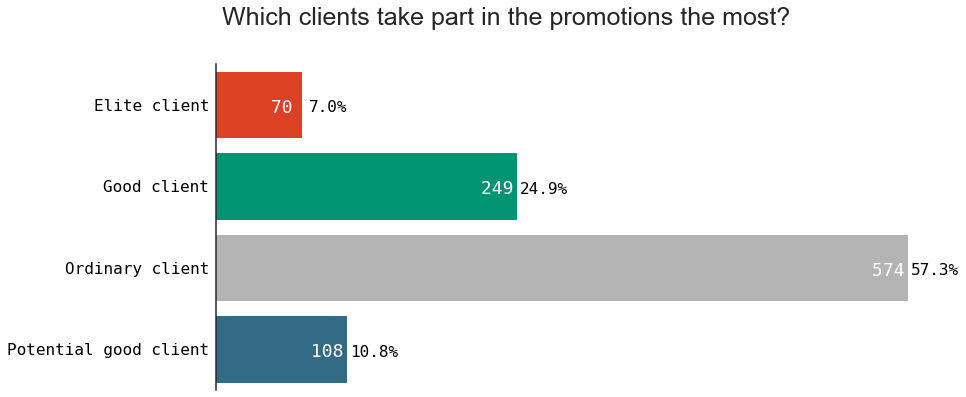

In [119]:
# clients responce to the promotion

fig = plt.figure(figsize = (13, 6))
plt.title('Which clients take part in the promotions the most?', size = 25, x = 0.4, y = 1.1)
a = sns.barplot(data = df.groupby(['Cluster']).agg({'TotalAcceptedCmp': 'sum'}).reset_index(), 
                x = 'TotalAcceptedCmp', y = 'Cluster', color = 'gold')
plt.xticks([])
plt.yticks(fontname = 'monospace', size = 16, color = 'black')
plt.xlabel('')
plt.ylabel('')

for p in a.patches:
    width = p.get_width()
    plt.text(width - 20, p.get_y() + 0.55*p.get_height(), f'{width: .0f}',
             ha = 'center', va = 'center', fontname = 'monospace', fontsize = 18, color = 'white')
    plt.text(23 + width, p.get_y() + 0.55*p.get_height(), f'{round((width / 1001) * 100, 1)}%',
             ha = 'center', va = 'center', fontname = 'monospace', fontsize = 16, color = 'black')
    if p.get_width() <=100:
        p.set_color('#dd4124')
    elif p.get_width() <= 250 and p.get_width() >=200:
        p.set_color('#009473')
    elif p.get_width() <= 200 and p.get_width() >=100:
        p.set_color('#336b87')
    else:
        p.set_color('#b4b4b4')
for j in ['right', 'top', 'bottom']:
    a.spines[j].set_visible(False)
a.spines['left'].set_linewidth(1.5)
plt.show()

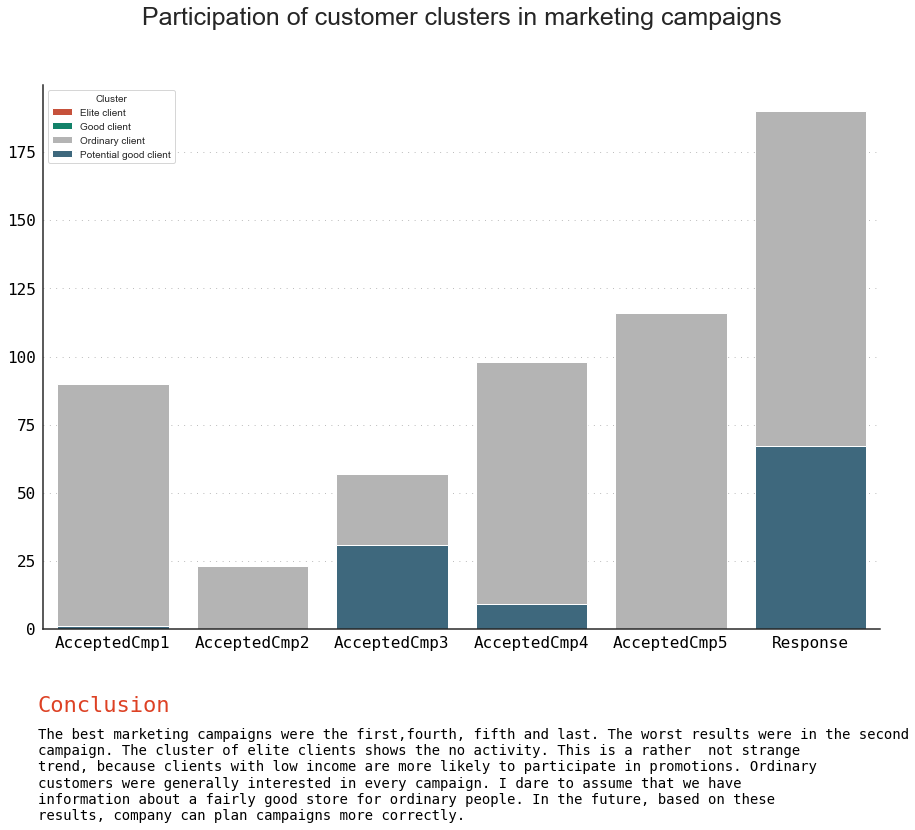

In [122]:
# Participation of customer clusters in marketing campaigns

fig = plt.figure(figsize = (15, 10))
plt.title('Participation of customer clusters in marketing campaigns', size = 25, x = 0.5, y = 1.1)
plt.grid(color = 'gray', linestyle = ':', axis = 'y', alpha = 0.8, zorder = 0,  dashes = (1,7))
a = sns.barplot(x = 'Cmp', y = 'value', hue = 'Cluster',
            data = df.groupby(['Cluster']).agg({'AcceptedCmp1': 'sum','AcceptedCmp2': 'sum', 
                               'AcceptedCmp3': 'sum','AcceptedCmp4': 'sum', 
                               'AcceptedCmp5': 'sum', 'Response': 'sum'}).stack().reset_index().rename(columns = {'level_1':'Cmp', 0: 'value'}),
            dodge = False, palette = ['#dd4124', '#009473', '#b4b4b4', '#336b87'])
plt.xticks(fontname = 'monospace', size = 16, color = 'black')
plt.yticks(fontname = 'monospace', size = 16, color = 'black')
plt.xlabel('')
plt.ylabel('')
for j in ['right', 'top']:
    a.spines[j].set_visible(False)
for j in ['bottom', 'left']:
    a.spines[j].set_linewidth(1.5)
    
plt.figtext(0.12, 0.01, 'Conclusion', fontname = 'monospace', size = 22, color = '#dd4124')
plt.figtext(0.12, -0.14, '''The best marketing campaigns were the first,fourth, fifth and last. The worst results were in the second
campaign. The cluster of elite clients shows the no activity. This is a rather  not strange
trend, because clients with low income are more likely to participate in promotions. Ordinary
customers were generally interested in every campaign. I dare to assume that we have
information about a fairly good store for ordinary people. In the future, based on these
results, company can plan campaigns more correctly.''', fontname = 'monospace', size = 14, color = 'black')

plt.show()

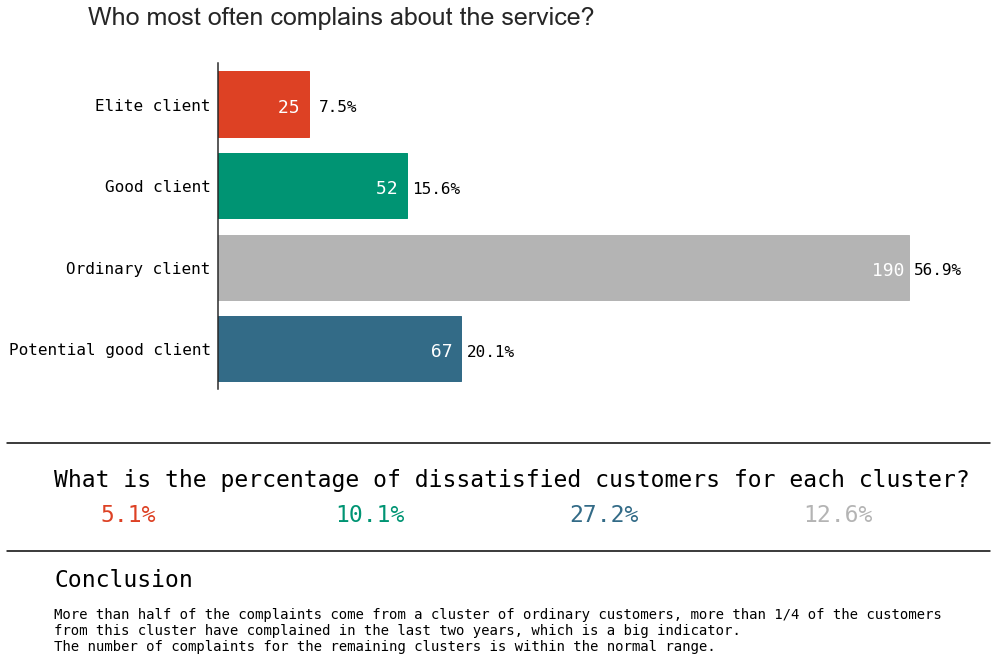

In [127]:
# complain received from clusters

fig = plt.figure(figsize = (13, 6))
plt.title('Who most often complains about the service?', size = 25, x = 0.17, y = 1.1)
a = sns.barplot(data = df.groupby(['Cluster']).agg({'Response': 'sum'}).reset_index(), 
                x = 'Response', y = 'Cluster')
plt.xticks([])
plt.yticks(fontname = 'monospace', size = 16, color = 'black')
plt.xlabel('')
plt.ylabel('')

for p in a.patches:
    width = p.get_width()
    plt.text(width - 7, p.get_y() + 0.55*p.get_height(), f'{width: .0f}',
             ha = 'center', va = 'center', fontname = 'monospace', fontsize = 18, color = 'white')
    plt.text(8 + width, p.get_y() + 0.55*p.get_height(), f'{round((width / 334) * 100, 1)}%',
             ha = 'center', va = 'center', fontname = 'monospace', fontsize = 16, color = 'black')
    if p.get_width() == 25:
        p.set_color('#dd4124')
    elif p.get_width() == 52:
        p.set_color('#009473')
    elif p.get_width() == 67:
        p.set_color('#336b87')
    else:
        p.set_color('#b4b4b4')
for j in ['right', 'top', 'bottom']:
    a.spines[j].set_visible(False)
a.spines['left'].set_linewidth(1.5)

l1 = lines.Line2D([-0.1, 0.95], [0, 0], transform = fig.transFigure, figure = fig, color = 'black', linestyle = '-',linewidth = 1.5)
fig.lines.extend([l1])

plt.figtext(-0.05, -0.1, 'What is the percentage of dissatisfied customers for each cluster?', fontname = 'monospace', size = 23, color = 'black')

x = 0
cl = 0
colors = ['#dd4124', '#009473', '#336b87', '#b4b4b4']
for i in round(df.groupby(['Cluster']).agg({'Response': 'mean'}).reset_index()['Response'] * 100, 1):
    plt.figtext(x, -0.18, f'{i}%', fontname = 'monospace', size = 23, color = colors[cl])
    x += 0.25
    cl += 1

l2 = lines.Line2D([-0.1, 0.95], [-0.25, -0.25], transform = fig.transFigure, figure = fig, color = 'black', linestyle = '-',linewidth = 1.5)
fig.lines.extend([l2])

plt.figtext(-0.05, -0.33, 'Conclusion', fontname = 'monospace', size = 23, color = 'black')
plt.figtext(-0.05, -0.48, '''More than half of the complaints come from a cluster of ordinary customers, more than 1/4 of the customers
from this cluster have complained in the last two years, which is a big indicator.
The number of complaints for the remaining clusters is within the normal range.''', fontname = 'monospace', size = 14, color = 'black')

plt.show()